<a href="https://colab.research.google.com/github/Ironsoldier353/freelance-clone/blob/main/extract_skills_from_resume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPDF2 spacy

Extracted Skills:
- Python
- Machine Learning
- Data Analysis
- R
- MATLAB
- Sphinx
- Mathematica
- Maple
- GIT
- CVS
- HTCondor
- Data Mining


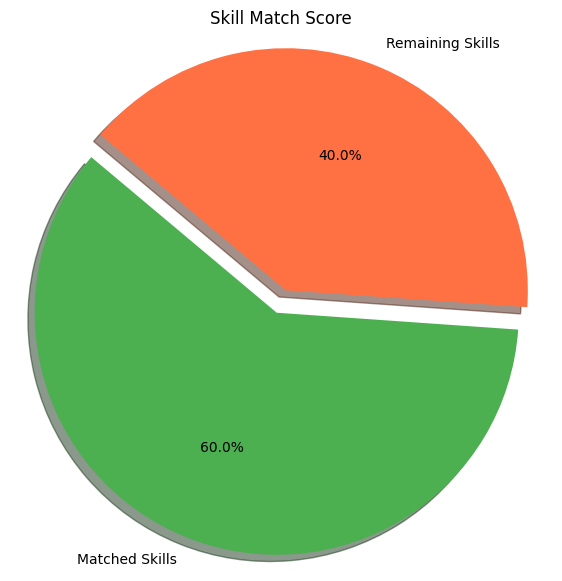


Skills you are missing:
- JavaScript
- SQL
- C++
- Flask
- Java
- Django
- React
- LaTeX

Recommended Courses:
- JavaScript: JavaScript: Understanding the Weird Parts by Udemy
- SQL: The Complete SQL Bootcamp by Udemy
- C++: Beginning C++ Programming by Udemy
- Flask: Flask: Full Stack Web Development by Udemy
- Java: Java Programming and Software Engineering Fundamentals by Coursera
- Django: Django for Everybody by Coursera
- React: React - The Complete Guide by Udemy
- LaTeX: No specific course available. Consider searching online resources or platforms like Coursera, Udemy, or edX.


In [ ]:
import PyPDF2
import spacy
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load spaCy's pre-trained English model
nlp = spacy.load("en_core_web_sm")

# Predefined list of required skills
required_skills = [
    "Python", "Java", "JavaScript", "C++", "SQL", "Django", "Flask",
    "React", "Machine Learning", "Data Analysis", "R", "MATLAB",
    "Sphinx", "LaTeX", "Mathematica", "Maple", "GIT", "CVS", "HTCondor", "Data Mining"
]

# Example courses
courses = {
    "Python": "Complete Python Bootcamp by Udemy",
    "Java": "Java Programming and Software Engineering Fundamentals by Coursera",
    "JavaScript": "JavaScript: Understanding the Weird Parts by Udemy",
    "C++": "Beginning C++ Programming by Udemy",
    "SQL": "The Complete SQL Bootcamp by Udemy",
    "Django": "Django for Everybody by Coursera",
    "Flask": "Flask: Full Stack Web Development by Udemy",
    "React": "React - The Complete Guide by Udemy",
    "Machine Learning": "Machine Learning by Stanford University on Coursera",
    "Data Analysis": "Data Analysis with Python by Coursera",
    "HTML": "HTML and CSS for Beginners by Udemy",
    "CSS": "Advanced CSS and Sass by Udemy",
    "Node.js": "The Complete Node.js Developer Course by Udemy",
    "Angular": "Angular - The Complete Guide by Udemy",
    "Ruby": "The Complete Ruby on Rails Developer Course by Udemy",
    "Ruby on Rails": "Ruby on Rails Web Development by Codecademy",
    "PHP": "PHP for Beginners - Become a PHP Master by Udemy",
    "Laravel": "Laravel - The PHP Framework for Web Artisans by Udemy",
    "Go": "Go Programming Language: Beginner to Advanced by Udemy",
    "Swift": "iOS App Development with Swift by Udacity",
    "Kotlin": "Kotlin for Android Developers by Udacity",
    "Android Development": "The Complete Android App Developer Bootcamp by Udemy",
    "iOS Development": "iOS App Development with Swift by Udacity",
    "C#": "C# Basics for Beginners by Udemy",
    "ASP.NET": "ASP.NET Core - Beginner to Advanced by Udemy",
    "R": "R Programming A-Z by Udemy",
    "Scala": "Functional Programming Principles in Scala by Coursera",
    "Haskell": "Introduction to Functional Programming by Coursera",
    "Perl": "Master Perl Programming by Udemy",
    "Shell Scripting": "Linux Shell Scripting: A Project-Based Approach by Udemy",
    "PowerShell": "Mastering Windows PowerShell by Udemy",
    "MATLAB": "MATLAB for Engineers by Coursera",
    "TensorFlow": "Deep Learning with TensorFlow by Coursera",
    "Keras": "Deep Learning with Python and Keras by Udemy",
    "PyTorch": "PyTorch for Deep Learning by Udemy",
    "Artificial Intelligence": "AI For Everyone by Coursera",
    "Deep Learning": "Deep Learning Specialization by Coursera",
    "Natural Language Processing": "Natural Language Processing with Python by Udemy",
    "Computer Vision": "Computer Vision A-Z by Udemy",
    "Blockchain": "Blockchain and Cryptocurrency Explained by Udemy",
    "Bitcoin": "Bitcoin and Cryptocurrency Technologies by Coursera",
    "Ethereum": "Ethereum and Solidity: The Complete Developer's Guide by Udemy",
    "Smart Contracts": "Smart Contracts - Ethereum Blockchain by Udemy",
    "DevOps": "DevOps: The Complete Guide by Udemy",
    "Docker": "Docker Mastery: The Complete Toolset by Udemy",
    "Kubernetes": "Kubernetes for Developers by Coursera",
    "AWS": "AWS Certified Solutions Architect - Associate by Udemy",
    "Azure": "Microsoft Azure Fundamentals by Udemy",
    "Google Cloud": "Google Cloud Platform for Beginners by Coursera",
    "Linux": "Linux Administration Bootcamp by Udemy",
    "Network Security": "The Complete Cyber Security Course by Udemy",
    "Ethical Hacking": "The Complete Ethical Hacking Course by Udemy",
    "Penetration Testing": "Learn Penetration Testing from Scratch by Udemy",
    "Cryptography": "Cryptography I by Coursera",
    "Information Security": "Introduction to Information Security by Coursera",
    "Agile": "Agile Project Management by Udemy",
    "Scrum": "Scrum Master Certification by Udemy",
    "Project Management": "Project Management Essentials by Udemy",
    "Git": "Git & GitHub Masterclass by Udemy",
    "GitHub": "Version Control with Git by Coursera",
    "Jenkins": "Jenkins, From Zero to Hero by Udemy",
    "Terraform": "Terraform for Beginners by Udemy",
    "Ansible": "Ansible for the Absolute Beginner by Udemy",
    "Puppet": "Puppet for DevOps - Beginner to Expert by Udemy",
    "Chef": "Chef for DevOps Engineers by Udemy",
    "Cybersecurity": "Introduction to Cyber Security by Coursera",
    "Data Science": "Data Science Specialization by Coursera",
    "Big Data": "Big Data Specialization by Coursera",
    "Hadoop": "The Ultimate Hands-On Hadoop - Tame your Big Data by Udemy",
    "Spark": "Apache Spark with Scala - Hands On with Big Data by Udemy",
    "Kafka": "Apache Kafka Series - Learn Apache Kafka for Beginners by Udemy",
    "MongoDB": "MongoDB - The Complete Developer's Guide by Udemy",
    "Redis": "Mastering Redis by Udemy",
    "Elasticsearch": "Elasticsearch 7 and the Elastic Stack by Udemy",
    "Cassandra": "Apache Cassandra: Hands-On Training by Udemy",
    "NoSQL": "NoSQL Databases by Coursera",
    "MySQL": "MySQL for Beginners by Udemy",
    "PostgreSQL": "The Complete PostgreSQL Bootcamp by Udemy",
    "Oracle": "Oracle SQL Performance Tuning Masterclass by Udemy",
    "SQL Server": "Microsoft SQL Server for Beginners by Udemy",
    "Tableau": "Tableau 2020 A-Z by Udemy",
    "Power BI": "Microsoft Power BI - A Complete Introduction by Udemy",
    "Excel": "Excel Skills for Business by Coursera",
    "Business Intelligence": "Business Intelligence Concepts, Tools, and Applications by Coursera",
    "Data Visualization": "Data Visualization with Tableau by Udemy",
    "Statistics": "Statistics for Data Science and Business Analysis by Udemy",
    "Probability": "Introduction to Probability by Coursera",
    "Linear Algebra": "Linear Algebra for Data Science in Python by Udemy",
    "Calculus": "Mathematics for Machine Learning by Coursera",
    "Algorithms": "Algorithms Specialization by Coursera",
    "Data Structures": "Data Structures and Algorithms by Udemy",
    "Operating Systems": "Operating Systems: Three Easy Pieces by Coursera",
    "Computer Networks": "Computer Networking - Principles, Protocols and Practice by Coursera",
    "Software Architecture": "Software Architecture for Developers by Udemy",
    "System Design": "Grokking the System Design Interview by Educative",
    "Distributed Systems": "Designing Data-Intensive Applications by Coursera",
    "Microservices": "Microservices with Spring Boot and Spring Cloud by Udemy",
    "Spring Boot": "Spring Boot Microservices with Spring Cloud by Udemy",
    "Hibernate": "Hibernate and Spring Data JPA by Udemy",
    "Web Development": "The Web Developer Bootcamp by Udemy",
    "Frontend Development": "The Complete Front-End Web Developer Bootcamp by Udemy",
    "Backend Development": "The Complete Back-End Web Developer Bootcamp by Udemy",
    "Full Stack Development": "The Complete Full-Stack JavaScript Course by Udemy",
    "UI/UX Design": "UI/UX Design Specialization by Coursera",
    "Graphic Design": "Graphic Design Bootcamp by Udemy",
    "Photoshop": "Adobe Photoshop CC - Essentials Training Course by Udemy",
    "Illustrator": "Adobe Illustrator CC - Essentials Training Course by Udemy",
    "3D Modeling": "3D Modeling in Blender by Udemy",
    "Game Development": "Complete C# Unity Developer 2D by Udemy",
    "Virtual Reality": "Virtual Reality Specialization by Coursera",
    "Augmented Reality": "Augmented Reality and ARCore by Coursera",
    "Mobile App Development": "The Complete Mobile App Developer Bootcamp by Udemy",
    "Cross-Platform Development": "Flutter & Dart - The Complete Guide by Udemy",
    "React Native": "React Native - The Practical Guide by Udemy",
    "Xamarin": "Xamarin Forms: Build Native Cross-platform Apps with C# by Udemy",
    "Unity": "Complete C# Unity Developer 3D by Udemy",
    "Unreal Engine": "Unreal Engine C++ Developer by Udemy",
    "VFX": "VFX for Beginners with After Effects by Udemy",
    "Animation": "The Beginner's Guide to Animation in Blender by Udemy",
    "Music Production": "Music Production in Logic Pro X - The Complete Guide by Udemy",
    "Sound Design": "Ultimate Sound Design Complete: Mastering Sound Design by Udemy",
    "Video Editing": "Video Editing with Adobe Premiere Pro for Beginners by Udemy",
    "Filmmaking": "Complete Filmmaker Guide: Become an Incredible Video Creator by Udemy",
    "Photography": "Photography Masterclass: A Complete Guide to Photography by Udemy",
    "Digital Marketing": "The Complete Digital Marketing Guide - 12 Courses in 1 by Udemy",
    "SEO": "SEO Training Masterclass 2023: Beginner to Advanced by Udemy",
    "Content Marketing": "Content Marketing Masterclass by Udemy",
    "Social Media Marketing": "Social Media Marketing MASTERY 2023 by Udemy",
    "Email Marketing": "Email Marketing - The Complete Guide by Udemy",
    "Copywriting": "Copywriting Secrets - How to Write Copy That Sells by Udemy",
    "Sales": "Sales Training: Practical Sales Techniques by Udemy",
    "Entrepreneurship": "Entrepreneurship 101: Who is Your Customer? by edX",
    "Leadership": "Leadership: Theory and Practice by Coursera",
    "Negotiation": "Successful Negotiation: Essential Strategies and Skills by Coursera",
    "Finance": "Finance for Non-Finance Professionals by Coursera",
    "Accounting": "Financial Accounting Fundamentals by Coursera",
    "Economics": "Principles of Economics by Coursera",
    "Investing": "The Complete Investing Course by Udemy",
    "Real Estate": "Real Estate Investing for Beginners by Udemy",
    "Personal Development": "Personal Development Masterclass by Udemy",
    "Time Management": "Time Management Mastery: Do More, Stress Less by Udemy",
    "Public Speaking": "Public Speaking Masterclass by Udemy",
    "Communication Skills": "Communication Skills Mastery by Udemy",
    "Mindfulness": "Mindfulness Meditation for Beginners by Udemy",
    "Yoga": "Yoga for Complete Beginners by Udemy",
    "Health and Fitness": "The Complete Fitness Guide by Udemy",
    "Nutrition": "Nutrition Masterclass: Build Your Perfect Diet & Meal Plan by Udemy",
    "Cooking": "Cooking Basics: Master the Fundamentals by Udemy",
    "Languages": "Learn Spanish - Complete Spanish Course for Beginners by Udemy",
    "English": "English for Career Development by Coursera",
    "French": "Learn French for Beginners by Udemy",
    "German": "German Language for Beginners by Udemy",
    "Japanese": "Japanese for Beginners by Udemy",
    "Chinese": "Chinese for Beginners by Coursera",
    "Russian": "Russian for Beginners by Udemy",
    "Arabic": "Arabic for Beginners by Udemy",
    "Italian": "Learn Italian for Beginners by Udemy",
    "Portuguese": "Learn Portuguese for Beginners by Udemy",
    "Critical Thinking": "Critical Thinking for Better Judgment and Decision-Making by Udemy",
    "Emotional Intelligence": "Emotional Intelligence: Master Anxiety, Fear, & Emotions by Udemy",
    "Creativity": "Creativity: Mastering Creativity by Udemy",
    "Art": "Art Fundamentals: Theory and Practice by Udemy",
    "History": "A History of the World since 1300 by Coursera",
    "Philosophy": "Introduction to Philosophy by Coursera",
    "Psychology": "Introduction to Psychology by Coursera",
    "Sociology": "Sociology: Understanding and Changing the Social World by Udemy",
    "Political Science": "Introduction to Political Science by Coursera",
    "Law": "An Introduction to American Law by Coursera",
    "Ethics": "Introduction to Ethics by Coursera",
    "Literature": "The Modern and the Postmodern (Part 1) by Coursera",
    "Writing": "Creative Writing Specialization by Coursera",
    "Journalism": "Journalism for Social Change by Coursera",
    "Environmental Science": "Introduction to Environmental Science by Coursera",
    "Biology": "Introduction to Biology by Coursera",
    "Chemistry": "Introduction to Chemistry by Coursera",
    "Physics": "How Things Work: An Introduction to Physics by Coursera",
    "Astronomy": "Astronomy: Exploring Time and Space by Coursera",
    "Geology": "Geology: Earth Science for Everyone by Udemy",
    "Anthropology": "Introduction to Anthropology by Coursera",
    "Archaeology": "Introduction to Archaeology by Coursera",
    "Astronomy": "Astronomy: Exploring Time and Space by Coursera",
    "Linguistics": "Introduction to Linguistics by Coursera",
    "Mathematics": "Mathematics for Computer Science by Coursera",
    "Physics": "How Things Work: An Introduction to Physics by Coursera"
}
def extract_text_from_pdf(pdf_file):
    """Extract text from a PDF file."""
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

def preprocess_text(text):
    """Preprocess text by lowering the case and removing non-alphanumeric characters."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

def extract_skills(text, skills):
    """Extract and match skills from the text using contextual analysis and pattern matching."""
    matched_skills = []
    text = preprocess_text(text)

    for skill in skills:
        skill_lower = skill.lower()
        if re.search(r'\b' + re.escape(skill_lower) + r'\b', text):
            matched_skills.append(skill)

    return matched_skills

def calculate_match_score(matched_skills, total_skills):
    """Calculate the match score based on matched skills."""
    match_percentage = (len(matched_skills) / total_skills) * 100
    return match_percentage

def create_pie_chart(match_percentage):
    """Create a pie chart to represent the match score."""
    labels = ['Matched Skills', 'Remaining Skills']
    sizes = [match_percentage, 100 - match_percentage]
    colors = ['#4CAF50', '#FF7043']
    explode = (0.1, 0)

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Skill Match Score')
    plt.show()

def suggest_courses(missing_skills):
    """Suggest courses for missing skills or notify if not available."""
    suggested_courses = {}
    for skill in missing_skills:
        if skill in courses:
            suggested_courses[skill] = courses[skill]
        else:
            suggested_courses[skill] = "No specific course available. Consider searching online resources or platforms like Coursera, Udemy, or edX."
    return suggested_courses

def parse_resume_and_generate_report(pdf_file):
    """Main function to parse the resume, calculate the match score, and generate the report."""
    extracted_text = extract_text_from_pdf(pdf_file)
    matched_skills = extract_skills(extracted_text, required_skills)
    missing_skills = list(set(required_skills) - set(matched_skills))
    match_score = calculate_match_score(matched_skills, len(required_skills))

    # Show extracted skills before generating the pie chart
    print("Extracted Skills:")
    for skill in matched_skills:
        print(f"- {skill}")

    # Generate pie chart
    create_pie_chart(match_score)

    # Report missing skills and suggest courses
    if missing_skills:
        print("\nSkills you are missing:")
        for skill in missing_skills:
            print(f"- {skill}")

        print("\nRecommended Courses:")
        suggested_courses = suggest_courses(missing_skills)
        for skill, course in suggested_courses.items():
            print(f"- {skill}: {course}")
    else:
        print("Congratulations! You have all the required skills.")

# Example usage
if __name__ == "__main__":
    resume_file_path = "/content/data-scientist-1559725114.pdf"
    with open(resume_file_path, "rb") as resume_file:
        parse_resume_and_generate_report(resume_file)
